Files already downloaded and verified
torch.Size([3, 32, 32])


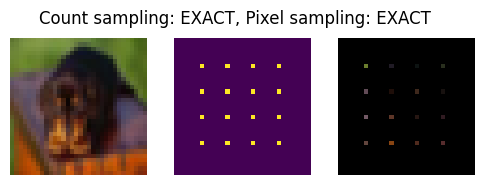

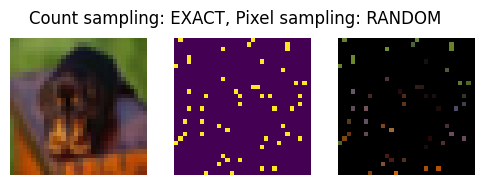

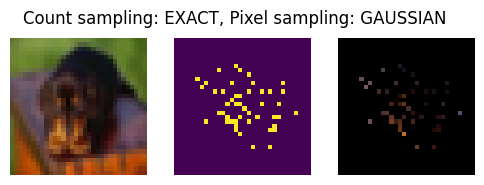

In [1]:
import torch
from config_loader import load_config, get_model_name
from datasets import load_dataset
from plotting import plot_conditioned_examples

config = load_config("VAE_16")
# Load dataset
train_loader, val_loader, test_loader, image_shape = load_dataset(config["data_params"])

model_name = get_model_name(config)
print(image_shape)
plot_conditioned_examples(next(iter(train_loader))[0][0])

In [ ]:
from lightning_extensions import ExtendedTrainer
from modules import VAEModule

model = VAEModule(config['model_params'], image_shape=image_shape, model_name=config['model_name'])

trainer = ExtendedTrainer(project_name="MTVAEs", **config['trainer_params'], model_name=model_name)
trainer.fit(model, train_loader, val_loader)
#save
trainer.save_model_checkpoint()

image_size:  torch.Size([3, 32, 32])


/Home/siv34/edzak2974/.conda/envs/pytorch2.1/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


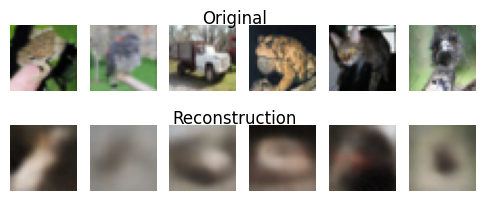

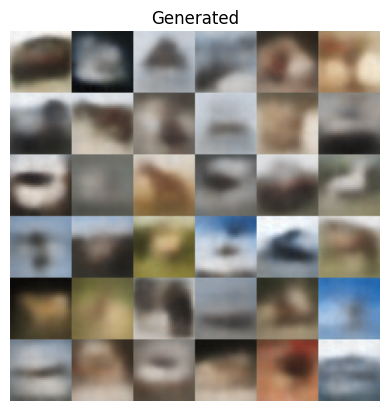

In [2]:
from modules import VAEModule
model = VAEModule.load_model_checkpoint(model_name = model_name)
model.eval()
from plotting import plot_stage_one_results
# plot some samples and their reconstruction

plot_stage_one_results(model, test_loader, save_name=model_name)